In [231]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from collections import OrderedDict
import os
from mpl_toolkits.mplot3d import Axes3D
font = {'family' : 'DejaVu Sans',
        'weight': 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

bar_codes = ['#7293cb', '#e1974c', '#84ba5b', '#d35e60', '#808585', '#9067a7',
             '#ab6857', '#ccc210']
line_codes = ['#396ab1', '#da7c30', '#3f9651', '#cc2529', '#535154', '#6b4c9a',
              '#922428', '#948b3d']

In [ ]:
data_dir = "../results"
hash_data_file = 'hash_perf.{}'
hash_file_sufix = [str(i) for i in range(1, 11)]

In [ ]:
for i in hash_file_sufix:
    mb_file = open('hash_perf_mb.{}'.format(i), 'w')
    sb_file = open('hash_perf_sb.{}'.format(i), 'w')
    with open(os.path.join(data_dir, hash_data_file.format(1))) as file:
        mb_lines = 0
        sb_lines = 0
        lines = file.readlines()
        for l in lines:
            if l.count('|') == 5:
                mb_file.write(l)
                mb_lines += 1
            if l.count('|') == 4:
                sb_file.write(l)
                sb_lines += 1
        print(mb_lines, sb_lines, len(lines))
        assert mb_lines + sb_lines == len(lines)
    mb_file.close()
    sb_file.close()

In [ ]:
sb_hash_file = "hash_perf_sb.{}"
sb_columns = "FilePath|BlockIndex|Algo|TimeElapsedUS".split('|')
mb_hash_file = "hash_perf_mb.{}"
mb_columns = "FilePath|WindowIndex|Algo|TimeElapsedUS|WindowSize".split('|')

[8.029831528933864, 8.029831528933864, 8.029831528933864, 8.029831528933864, 8.029831528933864, 8.029831528933864, 8.029831528933864, 8.029831528933864, 8.029831528933864, 8.029831528933864]
[2.0318093849544763, 2.0318093849544763, 2.0318093849544763, 2.0318093849544763, 2.0318093849544763, 2.0318093849544763, 2.0318093849544763, 2.0318093849544763, 2.0318093849544763, 2.0318093849544763]
[40.13601001033676, 40.13601001033676, 40.13601001033676, 40.13601001033676, 40.13601001033676, 40.13601001033676, 40.13601001033676, 40.13601001033676, 40.13601001033676, 40.13601001033676]
[4.868530033699024, 4.868530033699024, 4.868530033699024, 4.868530033699024, 4.868530033699024, 4.868530033699024, 4.868530033699024, 4.868530033699024, 4.868530033699024, 4.868530033699024]
[1.3810111869824204, 1.3810111869824204, 1.3810111869824204, 1.3810111869824204, 1.3810111869824204, 1.3810111869824204, 1.3810111869824204, 1.3810111869824204, 1.3810111869824204, 1.3810111869824204]
[2.4164348878277457, 2.41

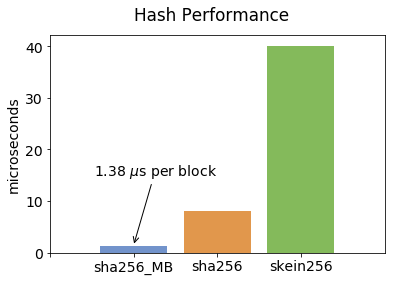

In [127]:
sha256_means = []
sha256_stds = []
skein256_means = []
skein256_stds = []
sha256_MB_means = []
sha256_MB_stds = []

algs = ['sha256_MB', 'sha256', 'skein256']

for i in hash_file_sufix:
    sb_df = pd.read_csv(sb_hash_file.format(1), sep='|', header=None)
    sb_df = sb_df.drop(4, axis=1)
    sb_df.columns = sb_columns
    alg_group = sb_df.groupby('Algo')
    
    sha256_means.append(alg_group.aggregate(np.mean).TimeElapsedUS['Sha256'])
    skein256_means.append(alg_group.aggregate(np.mean).TimeElapsedUS['Skein256'])
    
    sha256_stds.append(alg_group.aggregate(np.std).TimeElapsedUS['Sha256'])
    skein256_stds.append(alg_group.aggregate(np.std).TimeElapsedUS['Skein256'])

    mb_df = pd.read_csv(os.path.join(mb_hash_file.format(1)), sep='|', header=None)
    mb_df = mb_df.drop(5, axis=1)
    mb_df.columns = mb_columns
    win_groups = mb_df.groupby("WindowSize")
    
    sha256_MB_means.append(win_groups.get_group(8).TimeElapsedUS.mean() / 8)
    sha256_MB_stds.append(win_groups.get_group(8).TimeElapsedUS.std())

print(sha256_means)
print(sha256_stds)
print(skein256_means)
print(skein256_stds)
print(sha256_MB_means)
print(sha256_MB_stds)

hash_means = pd.DataFrame({
    'sha256_MB': sha256_MB_means,
    'sha256': sha256_means,
    'skein256': skein256_means
})

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for a in range(len(algs)):
    ax.bar(a + 1, hash_means[algs[a]].mean(), color=bar_codes[a])
ax.set_xlim(0, 4)
ax.set_xticks(range(0, 4))
ax.set_xticklabels([''] + algs)
ax.set_ylabel('microseconds')
fig.suptitle("Hash Performance")

ann_str = "{0:.2f} $\mu$s per block".format(hash_means.sha256_MB.mean())

ax.annotate(ann_str, xy=(1, hash_means.sha256_MB.mean()),
            arrowprops=dict(arrowstyle="->"),
            xytext=(-40, +70), textcoords='offset points')
#plt.show()
plt.savefig('hash_performance.png')

In [92]:
mb_hash_file = "hash_perf_mb.{}"
mb_columns = "FilePath|WindowIndex|Algo|TimeElapsedUS|WindowSize".split('|')

In [105]:
mb_df = pd.read_csv(os.path.join(mb_hash_file.format(1)), sep='|', header=None)
mb_df = mb_df.drop(5, axis=1)
mb_df.columns = mb_columns
win_groups = mb_df.groupby("WindowSize")

In [112]:
win_groups.get_group(8).TimeElapsedUS.mean() / 8

1.3810111869824204

In [95]:
mb_df

,FilePath,WindowIndex,Algo,TimeElapsedUS,WindowSize
0,../dataset/canterbury-large/bible.txt,0,Sha256MB,18,1
1,../dataset/canterbury-large/bible.txt,1,Sha256MB,11,1
2,../dataset/canterbury-large/bible.txt,2,Sha256MB,11,1
3,../dataset/canterbury-large/bible.txt,3,Sha256MB,11,1
4,../dataset/canterbury-large/bible.txt,4,Sha256MB,11,1


In [ ]:
alg_group = sb_df.groupby('Algo')

In [ ]:
alg_group.aggregate(np.mean).BlockIndex['Sha256']

In [ ]:
alg_group.aggregate(np.std)

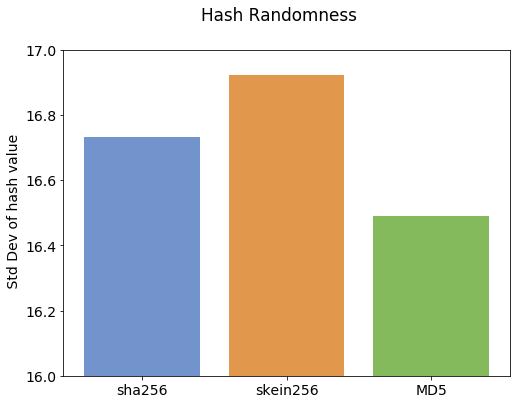

In [182]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
algs = ['sha256', 'skein256', 'MD5']
stds = [16.7326, 16.9214, 16.4905]
for i in range(len(algs)):
    ax.bar(i+1, stds[i], color=bar_codes[i])
ax.set_ylim(16, 17)
ax.set_xticks(range(1, len(algs) + 1))
ax.set_xticklabels(algs)
ax.set_ylabel(" Std Dev of hash value")
fig.suptitle("Hash Randomness")
plt.savefig('hash_randomness_ylimited.png')

#plt.show()


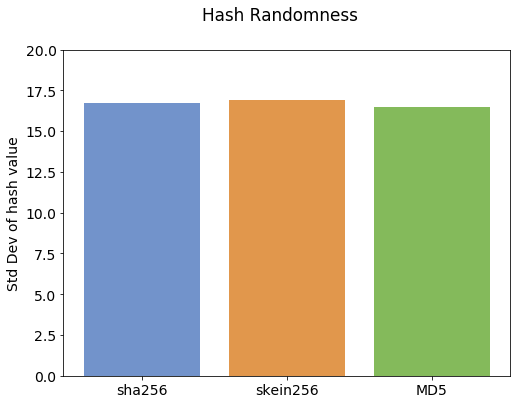

In [184]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
algs = ['sha256', 'skein256', 'MD5']
stds = [16.7326, 16.9214, 16.4905]
for i in range(len(algs)):
    ax.bar(i+1, stds[i], color=bar_codes[i])
ax.set_ylim(0, 20)
ax.set_xticks(range(1, len(algs) + 1))
ax.set_xticklabels(algs)
ax.set_ylabel("Std Dev of hash value")
fig.suptitle("Hash Randomness")
plt.savefig('hash_randomness.png')

#plt.show()

# MB sha

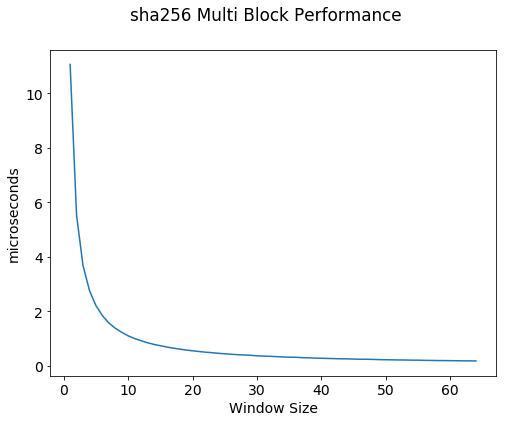

In [196]:
win_sizes = list(win_groups.groups)
hash_means = []
for win_size in win_sizes:
    win_df = win_groups.get_group(win_size)
    hash_means.append(win_df.TimeElapsedUS.mean() / win_size)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(win_sizes, hash_means)
ax.set_ylabel('microseconds')
ax.set_xlabel('Window Size')
fig.suptitle("sha256 Multi Block Performance")
fig.savefig("sha256_multi_block_performance.png")
#plt.show()

# combine hash compress

In [199]:
path = '../results'
prefix = 'hc_'
skein = 'sk'
sha = 'sh'
lz4 = 'lz4'
lzf = 'lzf'
hash_file_sufix = [str(i) for i in range(1, 11)]
hc_cols = 'hash compression latency throughput'.split()

In [229]:
skein_lzf = []
skein_lz4 = []
sha_lzf = []
sha_lz4 = []

skein_lzf = pd.DataFrame(columns=hc_cols)
skein_lz4 = pd.DataFrame(columns=hc_cols)
sha_lzf = pd.DataFrame(columns=hc_cols)
sha_lz4 = pd.DataFrame(columns=hc_cols)
for s in hash_file_sufix:
    df = pd.read_csv(os.path.join(path, '{}{}{}.{}'.format(prefix, skein, lzf, s)), header=None, sep='|')
    df.columns = hc_cols
    skein_lzf = skein_lzf.append(df)
    
    df = pd.read_csv(os.path.join(path, '{}{}{}.{}'.format(prefix, skein, lz4, s)), header=None, sep='|')
    df.columns = hc_cols
    skein_lz4 = skein_lz4.append(df)
    
    df = pd.read_csv(os.path.join(path, '{}{}{}.{}'.format(prefix, sha, lzf, s)), header=None, sep='|')
    df.columns = hc_cols
    sha_lzf = sha_lzf.append(df)
    
    df = pd.read_csv(os.path.join(path, '{}{}{}.{}'.format(prefix, sha, lz4, s)), header=None, sep='|')
    df.columns = hc_cols
    sha_lz4 = sha_lz4.append(df.iloc[0,:]) 

In [233]:
print(skein_lzf.throughput.mean())
print(skein_lz4.throughput.mean())
print(sha_lzf.throughput.mean())
print(sha_lz4.throughput.mean())

704.2
808.3
3127.2
4899.9


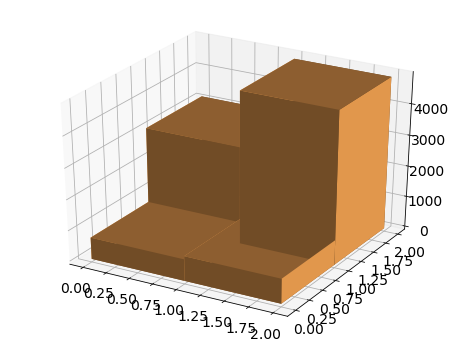

In [248]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111, projection='3d')
has_algs = ['skein', 'sha256_MB']
comp_algs = ['lzf', 'lz4']
_x = np.arange(2)
_y = np.arange(2)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
top = [skein_lzf.throughput.mean(),
       skein_lz4.throughput.mean(),
       sha_lzf.throughput.mean(),
       sha_lz4.throughput.mean()
      ]
bottom = np.zeros_like(top)
width = depth = 1
ax1.bar3d([0,0,0,0], y, bottom, width, depth, top, shade=True, color='#e1974c')

In [249]:
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.bar(0, )


In [238]:
x

array([0, 1, 0, 1])

In [239]:
y

array([0, 0, 1, 1])